In [1]:
# import all the libraries requeired
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
# Export and read the data 
mpg_data = pd.read_csv("/home/dat11_john/Homework/Auto_mpg_data_set.csv")

In [75]:
# Verify what the data looks like 
mpg_data.head(30)

,car_name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,1


In [6]:
# check for Null values 
mpg_data.isnull().sum()

car_name        0
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [7]:
# Summerize and look at data 
mpg_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [8]:
# visualize all variables to see which have a relationship
mpg_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.951787,0.844158,0.895220,-0.522452,-0.360762,-0.567478
displacement,-0.804203,0.951787,1.000000,0.898326,0.932475,-0.557984,-0.381714,-0.613056
horsepower,-0.778427,0.844158,0.898326,1.000000,0.866586,-0.697124,-0.424419,-0.460033
weight,-0.831741,0.895220,0.932475,0.866586,1.000000,-0.430086,-0.315389,-0.584109
acceleration,0.420289,-0.522452,-0.557984,-0.697124,-0.430086,1.000000,0.301992,0.218845
model_year,0.579267,-0.360762,-0.381714,-0.424419,-0.315389,0.301992,1.000000,0.187656
origin,0.563450,-0.567478,-0.613056,-0.460033,-0.584109,0.218845,0.187656,1.000000


In [10]:
# Import seaborn so we can create a heatmap for correlation
import seaborn as sns

mpg_data_corr = mpg_data.corr()

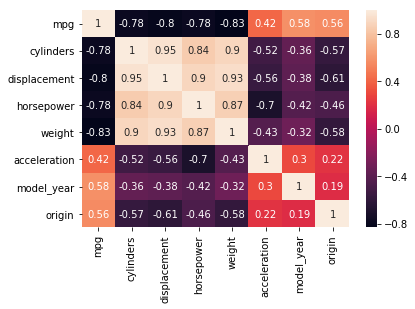

In [14]:
# the above table as a heatmap to easily identify relationships
sns.heatmap(mpg_data_corr, 
        xticklabels=mpg_data_corr.columns,
        yticklabels=mpg_data_corr.columns, annot=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23a8aea940>,
      dtype=object)

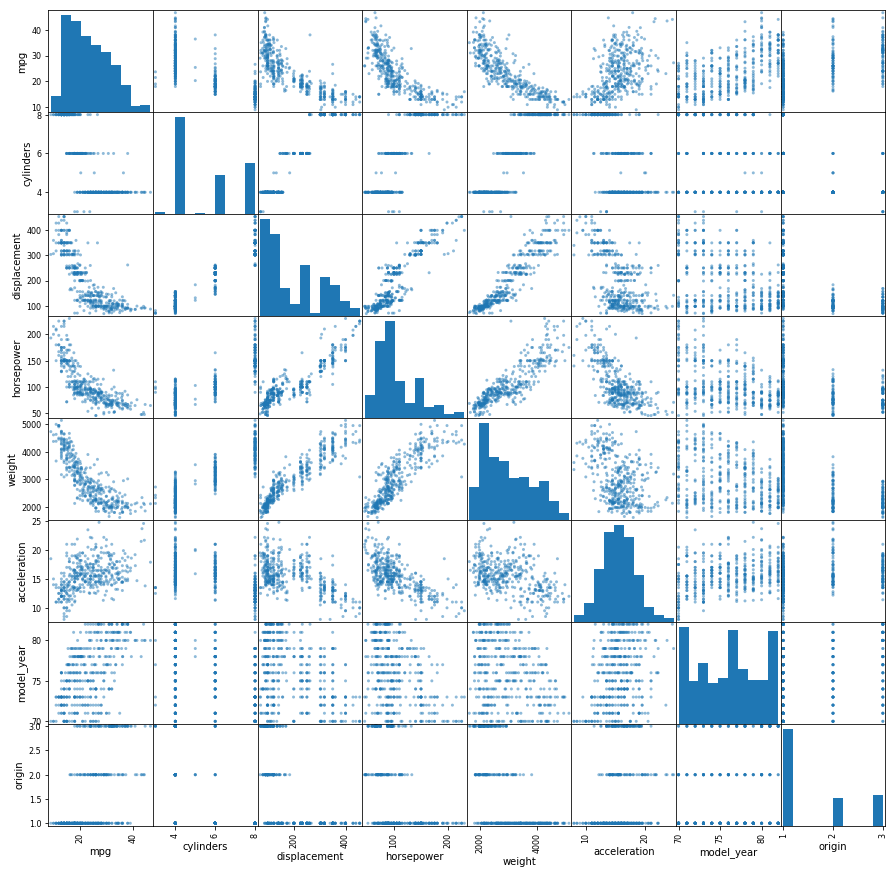

In [15]:
# Plot each variable against each other 
# scroll down past the subplot information
# Given we're also predicting mpg, the strongest relationsphip are with cylinder, displacement, horsepower and weight
pd.scatter_matrix(mpg_data, figsize=(15,15))

In [33]:
# Simple Linear Regression
# Create fitted models to see which variable provides a stronger relationship 
# create a fitted model in one line
mpg_displacement = smf.ols(formula='mpg ~ displacement', data=mpg_data).fit()
mpg_displacement.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           1.66e-91
Time:                        03:00:14   Log-Likelihood:                -1175.5
No. Observations:                 398   AIC:                             2355.
Df Residuals:                     396   BIC:                             2363.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       35.1748      0.492     71.519      0.000      34.208      36.142
displacement    -0.0603      0.002    -26.926      0.000      -0.065      -0.056
==============================================================================
Omnibus:                       41.373   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.024
Skew:                           0.711   Prob(JB):                     9.24e-14
Kurtosis:                       4.264   Cond. No.                         463.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

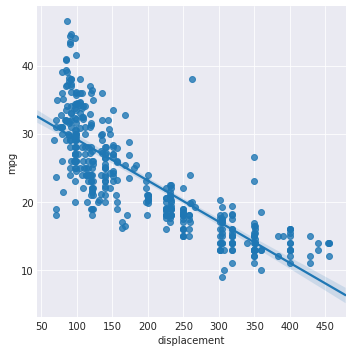

In [34]:
# check the distribution of mpg vs. cylinders using a scatterplot
sns.set_style("darkgrid")

sns.lmplot(y='mpg', x='displacement', data=mpg_data)

In [40]:
# checking weight
mpg_weight = smf.ols(formula='mpg ~ weight', data=mpg_data).fit()
mpg_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          2.97e-103
Time:                        03:03:54   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

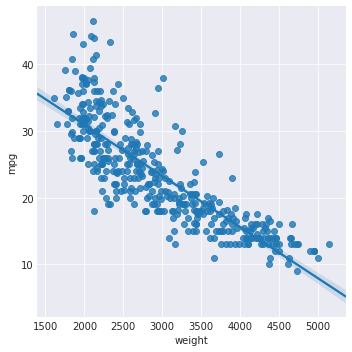

In [39]:
# Weight plot 
sns.set_style("darkgrid")

sns.lmplot(y='mpg', x='weight', data=mpg_data)

In [41]:
# horsepower 
mpg_horsepower = smf.ols(formula='mpg ~ horsepower', data=mpg_data).fit()
mpg_horsepower.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           7.03e-81
Time:                        03:05:08   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

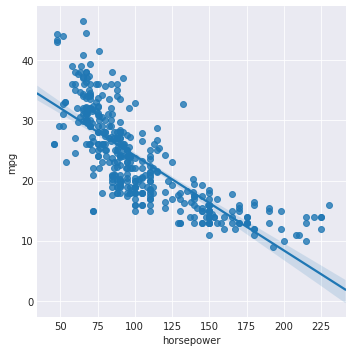

In [42]:
# horsepower plot 
sns.set_style("darkgrid")

sns.lmplot(y='mpg', x='horsepower', data=mpg_data)

In [45]:
# model_year 
mpg_model_year = smf.ols(formula='mpg ~ model_year', data=mpg_data).fit()
mpg_model_year.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           4.84e-37
Time:                        03:11:19   Log-Likelihood:                -1301.2
No. Observations:                 398   AIC:                             2606.
Df Residuals:                     396   BIC:                             2614.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -69.5556      6.589    -10.556      0.000     -82.510     -56.602
model_year     1.2244      0.087     14.141      0.000       1.054       1.395
==============================================================================
Omnibus:                       22.686   Durbin-Watson:                   0.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.247
Skew:                           0.383   Prob(JB):                     0.000297
Kurtosis:                       2.373   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

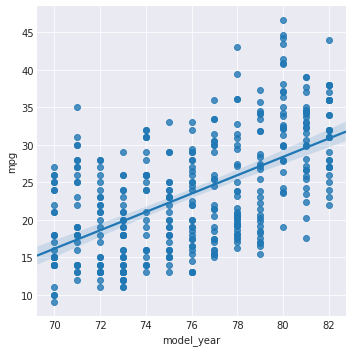

In [46]:
# model_year plot 
sns.set_style("darkgrid")

sns.lmplot(y='mpg', x='model_year', data=mpg_data)

In [73]:
# Weight provided the best fit model for simple regression with an R-Squared of 0.691 adjusted and P-Value below 0.05
mpg_weight.params

Intercept    46.317364
weight       -0.007677
dtype: float64

In [85]:
# create a DataFrame with the minimum and maximum values of Weight
# these values will be be used in the built model to predict the Price
mpg_data_new = pd.DataFrame({'weight': [mpg_data.weight.min(), mpg_data.weight.max()]})
mpg_data_new.head()

,weight
0,1613
1,5140


In [89]:
# Predicted mpg at min and max weight 
preds = mpg_weight.predict(mpg_data_new)
preds

0    33.934992
1     6.859589
dtype: float64

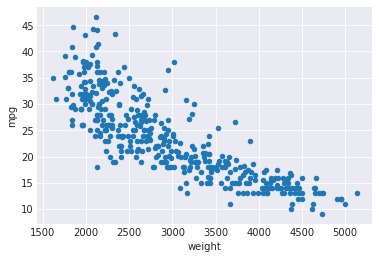

In [88]:
# Mpg a nd plot the observed data
mpg_data.plot(kind='scatter', x='weight', y='mpg')

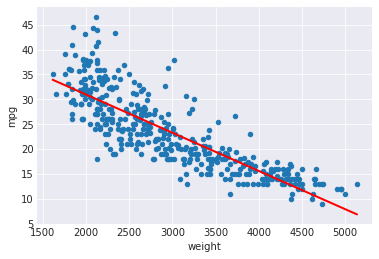

In [90]:
# Now, plot a line over the points that uses just the two points
mpg_data.plot(kind='scatter', x='weight', y='mpg')
# this code overlays a straight line between the the coordinates created by mpg_data_new and preds
plt.plot(mpg_data_new, preds, c='red', linewidth=2)

In [80]:
# Thus we could expect a car weighing 3000 to have the following fuel consumption in miles per gallon
x = -0.007677
intercept = 46.317364
y = intercept + (3000*x)
y

23.286364

In [68]:
# Using Multi-regression to see if we could have a better model
# after testing few combinations, below was the best due to higher adjusted R squared. Additionally, I have avoided having displacement, cylinders, horsepower and weight together due multicollinearity
mpg_model_year_weight = smf.ols(formula='mpg ~ model_year + weight + origin', data=mpg_data).fit()
mpg_model_year_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     587.7
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          4.96e-145
Time:                        03:43:34   Log-Likelihood:                -1044.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     394   BIC:                             2112.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.8822      3.958     -4.518      0.000     -25.664     -10.101
model_year     0.7559      0.048     15.808      0.000       0.662       0.850
weight        -0.0060      0.000    -23.873      0.000      -0.007      -0.006
origin         1.1663      0.258      4.524      0.000       0.659       1.673
==============================================================================
Omnibus:                       38.442   Durbin-Watson:                   1.259
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.514
Skew:                           0.570   Prob(JB):                     1.79e-16
Kurtosis:                       4.753   Cond. No.                     7.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

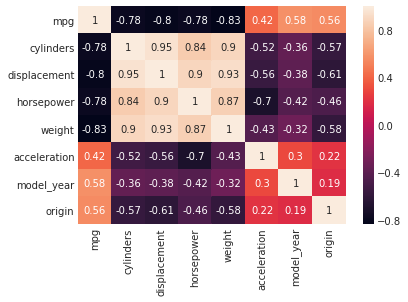

In [65]:
# the above table as a heatmap to easily identify relationships
sns.heatmap(mpg_data_corr, 
        xticklabels=mpg_data_corr.columns,
        yticklabels=mpg_data_corr.columns, annot=True)